(unit5.1)=
# Unit 5.1: Fourier Analysis

The preparatory reading for this section is [Chapter 7](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=213) of  {cite}`karris` and [Chapter 5](https://www.accessengineeringlibrary.com/content/book/9781260454246/toc-chapter/chapter5/section/section1) of {cite}`schaum`.

Follow along at [cpjobling.github.io/eg-150-textbook/fourier_series/1/trig_fseries](https://cpjobling.github.io/eg-150-textbook/fourier_series/1/trig_fseries)

![QR Code for this lecture](pictures/qrcode_fs1.png)

(fs1:intro)=
## Introduction

Any periodic waveform with *fundamental frequency* $\Omega_0 = 2\pi F_0$ can be approximated by a DC component (which may be 0) and the sum of sinusoidal waveforms at the fundamental and *integer multiples* of the fundamental frequency. 

These integer multiples of the fundamental frequency $2\Omega_0$, $3\Omega_0$, $4\Omega_0$, $\ldots,\ \Omega_N$ are called the *harmonic frequencies*.

The approximation of a periodic waveform by a sum of *harmonic waveforms*, is known as *Fourier analysis*.

Fourier analysis has important applications in many branches of electronics but is particularly crucial for signal processing and communications.

## Agenda

* {ref}`fs1:intro`

* {ref}`fs1:periodic_signals`

* {ref}`fs1:motivation`

* {ref}`fs1:wave_analysis`

* {ref}`fs1:symmetry`

* {ref}`fs1:matlab`

* {ref}`fs1:gibbs`

* {ref}`examples16`

(fs1:periodic_signals)=
## Periodic Signals

In {ref}`periodic_signals` we defined a continuous-time signal $x(t)$ to be periodic if there is a positive nonzero value of $T$ for which

$$x(t + nT) = x(t)\qquad\mathrm{all}\ t$$ (eq:fs1:1)

The *fundamental period* $T_0$ of $x(t)$ is the smallest positive value of $T$ for which Eq. {eq}`eq:fs1:1` is satisfied, and $1/T_0 = ƒ_0$ is referred to as the *fundamental frequency*.

Two basic examples of periodic signals are the real sinusoidal signal

$$x(t) = \cos\left(\Omega_0 t + \phi\right)$$ (eq:fs1:2)

and the complex exponential signal

$$x(t) = e^{j\Omega t}$$ (eq:fs1:3)

where $\Omega_0 = 2\pi/T_0 = 2\piƒ_0$ is called the *fundamental angular frequency*.

(fs1:motivation)=
## Motivating Examples

This [Fourier Series demo](http://dspfirst.gatech.edu/matlab/#fseriesdemo), developed by Members of the Center for Signal and Image Processing (CSIP) at the [School of Electrical and Computer Engineering](https://www.ece.gatech.edu/) at the [Georgia Institute of Technology](https://www.gatech.edu/), shows how periodic signals can be synthesised by a sum of sinusoidal signals.

It is here used as a motivational example in our introduction to [Fourier Series](https://en.wikipedia.org/wiki/Fourier_series) [Wikipedia]. (See also [Fourier Series](https://mathworld.wolfram.com/FourierSeries.html) from Wolfram MathWorld)

To install this example, download the [zip file](http://dspfirst.gatech.edu/matlab/ZipFiles/fseriesdemo-v144.zip) and unpack it somewhere on your MATLAB path.

### Demo 1

Building up wave forms from sinusoids.

In [1]:
fseriesdemo

### Demo 2

Actual measurements

Taken by Dr Tim Davies with a Rhode&Schwarz Oscilloscope.

Note all spectra shown in these slides are generated numerically from the input signals by sampling and the application of the Fast Fourier Transform (FFT).

#### 1 kHz Sinewave

![A 1 kHz sinewave](pictures/1kHz_Sinewave.png "A 1kHz sinewave")

#### Spectrum of 1kHz sinewave

![Spectrum of 1kHz sinewave. Note one line at fundamental frequency.](pictures/fft_of_sinwave.png "Spectrum of 1kHz sinewave. Note one line at fundamental frequency.")

#### 1 kHz Squarewave

![A 1 kHz square wave](pictures/1kHz_sqr.png "A 1kHz square wave.")

#### Spectrum of 1kHz square wave

![Spectrum of 1kHz sinewave. Note only odd harmonics present.](pictures/FFT_sqr.png "Spectrum of 1kHz square wave. Note only odd harmonics present.")

Clearly showing peaks at fundamental, 1/3, 1/5, 1/7 and 1/9 at 3rd, 5th and 7th harmonic frequencies. Note for the square wave, harmonics decline in amplitude as the reciprocal of the harmonic number $n$.

#### 1 kHz triangle waveform

![A 1 kHz triangle waveform](pictures/1kHz_saw.png "A 1 kHz triangle waveform")

#### Spectrum of 1kHz triangle waveform

![Spectrum of 1kHz triangle wavform.](pictures/1kHz_saw_fft.png "Spectrum of 1kHz triangle wavform.")

Clearly showing peaks at fundamental, 1/9, 1/25, 1/7 and 1/49 at 3rd, 5th and 7th harmonic frequencies. Note for the triangle waveform, harmonics decline in amplitude as the reciprocal of the square of $n$.

(fs1:wave_analysis)=
## Wave Analysis

* [Jean Baptiste Joseph Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier) (21 March 1768 – 16 May 1830) discovered that any _**periodic**_ signal could be represented as a series of *harmonically related* sinusoids.

* An *harmonic* is a frequency whose value is an integer multiple of some *fundamental frequency*

* For example, the frequencies 2 MHz, 3 Mhz, 4 MHz are the second, third and fourth harmonics of a sinusoid with fundamental frequency 1 Mhz.

### The Trigonometric Fourier Series

Any periodic waveform $f(t)$ can be represented as

$$
\begin{eqnarray*}
  f(t) &=& \frac{1}{2}{a_0} + {a_1}\cos \Omega_0 t + {a_2}\cos 2\Omega_0 t + {a_3}\cos 3\Omega_0 t +  \cdots  + {a_n}\cos n\Omega_0 t +  \cdots  \\ 
   &+& {b_1}\sin \Omega_0 t + {b_2}\sin 2\Omega_0 t + {b_3}\sin 3\Omega_0 t +  \cdots  + {b_n}\sin n\Omega_0 t +  \cdots  \\ 
\end{eqnarray*}
$$ (eq:fs1:4)

or equivalently (if more confusingly)

$$
f(t) = \frac{1}{2}{a_0} + \sum\limits_{n = 1}^\infty  {({a_n}\cos n\Omega_0 t + {b_n}\sin n\Omega_0 t)}
$$ (eq:fs1:5)

where $\Omega_0$ rad/s is the *fundamental frequency*.

### Notation

* The first term $a_o/2$ is a constant and represents the DC (average) component of the signal $f(t)$
* The terms with coefficients $a_1$ and $b_1$ together represent the fundamental frequency component of $f(t)$ at frequency $\Omega_0$.
* The terms with coefficients $a_2$ and $b_2$ together represent the second harmonic frequency component of $f(t)$ at frequency $2\Omega_0$.

And so on.

Since any periodic function $f(t)$ can be expressed as a Fourier series, it follows that the sum of the DC, fundamental, second harmonic and so on must produce the waveform $f(t)$.

### Sums of sinusoids

In general, the sum of two or more sinusoids does not produce a sinusoid as shown below.

<img src="pictures/7_1.png">

To generate this picture use [fourier_series1.m](https://cpjobling.github.io/eg-247-textbook/fourier_series/matlab/fourier_series1.m).

### Evaluation of the Fourier series coefficients

The coefficients are obtained from the following expressions (valid for any periodic waveform with fundamental frequency $\Omega_0$ so long as we integrate over one period $0\to T_0$ where $T_0 = 2\pi/\Omega_0$), and $\theta = \Omega_0 t$:

$$\frac{1}{2}a_0 = \frac{1}{T_0}\int_{0}^{T_0}f(t)d t = \frac{1}{\pi}\int_{0}^{2\pi}f(\theta )d \theta$$ (eq:fs1:6)

$$a_n = \frac{1}{T_0}\int_{0}^{T_0}f(t)\cos n\Omega_0 t\,dt = \frac{1}{2\pi}\int_{0}^{2\pi}f(\theta)\cos n\theta\,d\theta$$ (eq:fs1:7)

$$b_n = \frac{1}{T_0}\int_{0}^{T_0}f(t)\sin n\Omega_0 t\,dt = \frac{1}{2\pi}\int_{0}^{2\pi}f(\theta)\sin n\theta \,d\theta$$ (eq:fs1:8)

(fs1:symmetry)=
## Odd, Even and Half-wave Symmetry

### Odd and even symmetry

* An *odd* function is one for which $f(t) = -f(-t)$. The function $\sin t$ is an *odd* function.
* An *even* function is one for which $f(t) = f(-t)$. The function $\cos t$ is an *even* function.

### Half-wave symmetry

* A periodic function with period $T$ is a function for which $f(t) = f(t + T)$
* A periodic function with period $T$, has *half-wave symmetry* if $f(t) = -f(t + T/2)$

### Symmetry in Trigonometric Fourier Series

There are simplifications we can make if the original periodic properties has certain properties:

* If $f(t)$ is odd, $a_0=0$ and there will be no cosine terms so ${a_n} = 0\; \forall n > 0$
* If $f(t)$ is even, there will be no sine terms and ${b_n} = 0\; \forall n > 0$. The DC may or may not be zero.
* If $f(t)$ has *half-wave symmetry* only the odd harmonics will be present. That is $a_n$ and $b_n$ is zero for all even values of $n$ (0, 2, 4, ...)

### Some simplifications that result from symmetry

* The limits of the integrals used to compute the coefficents $a_n$ and $b_n$ of the Fourier series are given as $0\to 2\pi$ which is one period $T$
* We could also choose to integrate from $-\pi \to \pi$
* If the function is *odd*, or *even* or has *half-wave symmetry* we can compute $a_n$ and $b_n$ by integrating from $0\to \pi$ and multiplying by 2.
* If we have *half-wave symmetry* we can compute $a_n$ and $b_n$ by integrating from $0\to \pi/2$ and multiplying by 4.

(For more details see page 7-10 of {cite}`karris`)

(fs1:matlab)=
## Computing coefficients of Trig. Fourier Series in MATLAB 

The computation of the coefficients of the trig. fourier series is a painstaking, error-prone process and we need to use a computer.

As an example let's take a square wave with amplitude $\pm A$ and period $T$.

<img src="pictures/square_wave.png">

### Solution

In [2]:
clear all
cd ../matlab
format compact

In [3]:
syms t n A pi
n = [1:11];

DC component

In [4]:
half_a0 = 1/(2*pi)*(int(A,t,0,pi)+int(-A,t,pi,2*pi))

half_a0 =


0


Compute harmonics

In [5]:
ai = 1/pi*(int(A*cos(n*t),t,0,pi)+int(-A*cos(n*t),t,pi,2*pi));
bi = 1/pi*(int(A*sin(n*t),t,0,pi)+int(-A*sin(n*t),t,pi,2*pi));

Reconstruct $f(t)$ from harmonic sine functions

In [6]:
ft = half_a0;
for k=1:length(n)
    ft = ft + ai(k)*cos(k*t) + bi(k)*sin(k*t);
end;

Make numeric

In [7]:
ft_num = subs(ft,A,1.0);

Print using 4 sig digits

In [8]:
ft_num = vpa(ft_num, 4)

ft_num =


(sin(t)*((2.0*cos(pi) + 1.0)*(cos(pi) - 1.0) - 1.0*cos(pi) + 1.0))/pi + (cos(4.0*t)*(0.5*sin(4.0*pi) - 0.25*sin(8.0*pi)))/pi + (cos(8.0*t)*(0.25*sin(8.0*pi) - 0.125*sin(16.0*pi)))/pi + (sin(5.0*t)*(0.2*cos(10.0*pi) - 0.2*cos(5.0*pi) + 0.4*sin(2.5*pi)^2))/pi + (sin(10.0*t)*(0.1*cos(20.0*pi) - 0.1*cos(10.0*pi) + 0.2*sin(5.0*pi)^2))/pi + (sin(9.0*t)*(0.1111*cos(18.0*pi) - 0.1111*cos(9.0*pi) + 0.2222*sin(4.5*pi)^2))/pi + (sin(11.0*t)*(0.09091*cos(22.0*pi) - 0.09091*cos(11.0*pi) + 0.1818*sin(5.5*pi)^2))/pi + (sin(3.0*t)*(0.3333*cos(6.0*pi) - 0.3333*cos(3.0*pi) + 0.6667*sin(1.5*pi)^2))/pi + (sin(6.0*t)*(0.1667*cos(12.0*pi) - 0.1667*cos(6.0*pi) + 0.3333*sin(3.0*pi)^2))/pi + (sin(7.0*t)*(0.1429*cos(14.0*pi) - 0.1429*cos(7.0*pi) + 0.2857*sin(3.5*pi)^2))/pi + (sin(2.0*t)*(sin(pi)^2 + sin(pi)^2*(4.0*sin(pi)^2 - 3.0)))/pi + (sin(4.0*t)*(0.25*cos(8.0*pi) - 0.25*cos(4.0*pi) + 0.5*sin(2.0*pi)^2))/pi + (sin(8.0*t)*(0.125*cos(16.0*pi) - 0.125*cos(8.0*pi) + 0.25*sin(4.0*pi)^2))/pi + (cos(9.0*t)*(0.2222*

(18.0*pi)))/pi + (cos(5.0*t)*(0.4*sin(5.0*pi) - 0.2*sin(10.0*pi)))/pi + (cos(10.0*t)*(0.2*sin(10.0*pi) - 0.1*sin(20.0*pi)))/pi + (cos(2.0*t)*(0.5*sin(2.0*pi) + 0.5*sin(2.0*pi)*(4.0*sin(pi)^2 - 1.0)))/pi + (cos(11.0*t)*(0.1818*sin(11.0*pi) - 0.09091*sin(22.0*pi)))/pi + (cos(3.0*t)*(0.6667*sin(3.0*pi) - 0.3333*sin(6.0*pi)))/pi + (cos(6.0*t)*(0.3333*sin(6.0*pi) - 0.1667*sin(12.0*pi)))/pi + (cos(t)*(sin(pi) - 1.0*sin(pi)*(2.0*cos(pi) - 1.0)))/pi + (cos(7.0*t)*(0.2857*sin(7.0*pi) - 0.1429*sin(14.0*pi)))/pi


Plot result

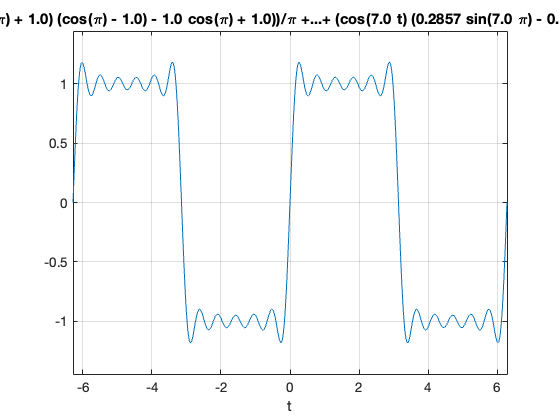

In [9]:
ezplot(ft_num),grid

Plot original signal (we could use `heaviside` for this as well)

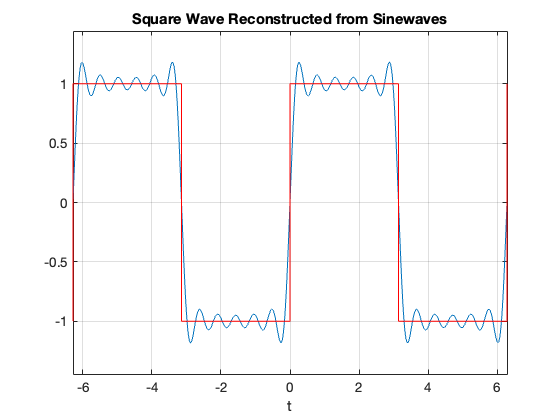

In [10]:
ezplot(ft_num)
hold on
clear pi
t = [-3,-2,-2,-2,-1,-1,-1,0,0,0,1,1,1,2,2,2,3]*pi;
f = [-1,-1,0,1,1,0,-1,-1,0,1,1,0,-1,-1,0,1,1];
plot(t,f,'r-')
grid
title('Square Wave Reconstructed from Sinewaves')
hold off

To run the full solution yourself download and run [square_ftrig.mlx](https://cpjobling.github.io/eg-150-textbook/fourier_series/matlab/square_ftrig.mlx).

The Result confirms that:

* $a_0 = 0$
* $a_i = 0$: function is odd
* $b_i = 0$: for $i$ even - half-wave symmetry

```
ft =
 
(4*A*sin(t))/pi + (4*A*sin(3*t))/(3*pi) + (4*A*sin(5*t))/(5*pi) + (4*A*sin(7*t))/(7*pi) + (4*A*sin(9*t))/(9*pi) + (4*A*sin(11*t))/(11*pi)
```

Note that the coefficients match those given in the textbook (Section 7.4.1).

$$f(t) = \frac{4A}{\pi}\left(\sin \Omega_0 t + \frac{1}{3}\sin 3\Omega_0 t + \frac{1}{5}\sin 5\Omega_0 t + \cdots\right) = \frac{4A}{\pi}\sum_{n=\mathrm{odd}}\frac{1}{n}\sin n\Omega_0 t$$

(fs1:gibbs)=
## Gibbs Phenomenon

In an earlier slide we found that the trigonometric for of the Fourier series of the square waveform is

$$f(t) = \frac{4A}{\pi}\left(\sin \Omega_0 t + \frac{1}{3}\sin 3\Omega_0 t + \frac{1}{5}\sin 5\Omega_0 t + \cdots\right) = \frac{4A}{\pi}\sum_{n=\mathrm{odd}}\frac{1}{n}\sin n\Omega_0 t$$

This figure shows the approximation for the first 11 harmonics:

<img src="pictures/fsq_trig.png">

As we add more harmonics, the sum looks more and more like a square wave. However the crests do not become flattened; this is known as *Gibbs Phenomenon* and it occurs because of the discontinuity of the perfect sqare waveform as it changes from 
$+A$ to $-A$ and *vice versa*.

(examples16)=
# Examples 16

(ex:16.1)=
### Example 16.1: Symmetry in Common Waveforms

To reproduce the following waveforms (without annotation) publish the script [waves.m](https://cpjobling.github.io/eg-150-textbook/fourier_series/matlab/waves.m).

For each of the following, determine the average value of the waveform over 1 period, state whether it is even or odd, determine if the waveform has halfwave symmetry $f(t) = -f(t + T/2)$.

#### a) Squarewave

<img src="pictures/square.png">

* Average value over period $T$ is ...?
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

#### b) Shifted Squarewave

<img src="pictures/shifted_sq.png">

* Average value over period $T$ is 
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

#### c) Sawtooth

<img src="pictures/sawtooth.png">

* Average value over period $T$ is 
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

#### Triangle

<img src="pictures/triangle.png">

* Average value over period $T$ is 
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

(ex:16.2)=
### Example 16.2: Symmetry in fundamental, Second and Third Harmonics

In the following, $T/2$ is taken to be the half-period of the fundamental sinewave.

Evaluate the symmetry of the following fundamental and harmonic frequencies.

#### a) Fundamental

<img src="pictures/fundamental.png">


* Average value over period $T$ is 
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

#### b) Second Harmonic

<img src="pictures/2nd_harm.png">


* Average value over period $T$ is 
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

#### b) Third Harmonic

<img src="pictures/3rd_harm.png">

* Average value over period $T$ is 
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

(ex:16.3)=
### Example 16.3: Using symmetry - computing the Fourier series coefficients of the shifted square wave

<img src="pictures/shifted_square_wave.png">

Calculation of Fourier coefficients for Shifted Square Wave Exploiting half-wave symmetry. This is almost the same procedure as illustrated in {ref}`fs1:matlab`. 

You can confirm the results by downloading and executing this file: [shifted_sq_ftrig.mlx](https://cpjobling.github.io/eg-150-textbook/fourier_series/matlab/shifted_sq_ftrig.mlx).

In [11]:
clear all
syms t n A pi

Define harmonics

In [12]:
n = [1:11];

DC component

In [13]:
half_a0 = 0

half_a0 =
     0


Compute harmonics - use half-wave symmetry

In [14]:
ai = 4/pi*int(A*cos(n*t),t,0,pi/2);

In [15]:
bi = zeros(size(n));

Reconstruct f(t) from harmonic sine functions

In [16]:
ft = half_a0;
for k=1:length(n)
    ft = ft + ai(k)*cos(k*t) + bi(k)*sin(k*t);
end

Make numeric and print to 4 sig. figs.

In [17]:
ft_num = subs(ft,A,1.0);
ft_num = vpa(ft_num, 4)

ft_num =


(cos(4.0*t)*sin(2.0*pi))/pi + (0.5*cos(8.0*t)*sin(4.0*pi))/pi + (0.4444*cos(9.0*t)*sin(4.5*pi))/pi + (0.8*cos(5.0*t)*sin(2.5*pi))/pi + (0.4*cos(10.0*t)*sin(5.0*pi))/pi + (0.3636*cos(11.0*t)*sin(5.5*pi))/pi + (1.333*cos(3.0*t)*sin(1.5*pi))/pi + (0.6667*cos(6.0*t)*sin(3.0*pi))/pi + (0.5714*cos(7.0*t)*sin(3.5*pi))/pi + (4.0*sin(0.5*pi)*cos(t))/pi + (2.0*cos(2.0*t)*sin(pi))/pi


plot result and overlay original signal (we could use `heaviside` for this as well.

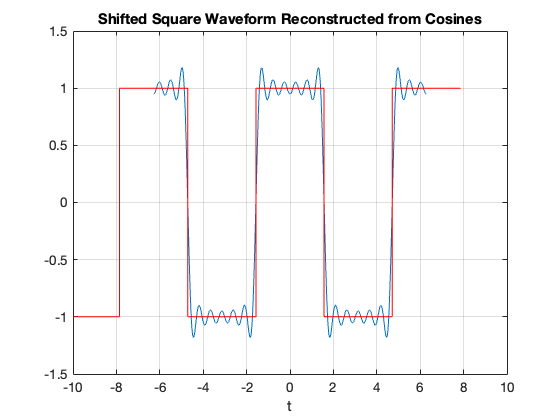

In [18]:
clear pi
ezplot(ft_num)
hold on
t = [-3,-2,-2,-2,-1,-1,-1,0,0,0,1,1,1,2,2,2,3]*pi;
f = [-1,-1,0,1,1,0,-1,-1,0,1,1,0,-1,-1,0,1,1];
plot(t-pi/2,f,'r-')
axis([-10,10,-1.5,1.5])
grid
title('Shifted Square Waveform Reconstructed from Cosines')
hold off

* As before $a_0=0$
* We observe that this function is even, so all $b_k$ coefficents will be zero
* The waveform has half-wave symmetry, so only odd indexed coefficents will be present.
* Further more, because it has half-wave symmetry we can just integrate from $0 \to \pi/2$ and multiply the result by 4.

Note that the coefficients match those given in Section 7.4.2 of {cite}`karris`.

$$f(t) = \frac{4A}{\pi}\left(\cos \Omega_0 t - \frac{1}{3}\cos 3\Omega_0 t + \frac{1}{5}\cos 5\Omega_0 t - \cdots\right) = \frac{4A}{\pi}\sum_{n=\mathrm{odd}}(-1)^{\frac{n-1}{2}} \frac{1}{n}\cos n\Omega_0 t$$

(fs1:summary)=
## Summary

In this unit we ...

* {ref}`fs1:intro`

* {ref}`fs1:periodic_signals`

* {ref}`fs1:motivation`

* {ref}`fs1:wave_analysis`

* {ref}`fs1:symmetry`

* {ref}`fs1:matlab`

* {ref}`fs1:gibbs`

* {ref}`examples16`

(unit5.1:takeaways)=
### Takeaways

## Next Time

We move on to consider 

* {ref}`unit5.2`

## References

```{bibliography}
:filter: docname in docnames
```